In [1]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import dash_core_components as dcc
import numpy as np
from collections import Counter
from tqdm.auto import tqdm

In [2]:
from utils import EndoMaterial
from utils_pdf import PDF
from datetime import datetime as dt
from datetime import date
import os
import pathlib
from typing import Optional, List

In [3]:
from fpdf import FPDF, TitleStyle

In [4]:
path_mat_doc = "data/Materialdokumentation.xlsx"
path_imd = "data/IMD_Endoskopie.xlsx"
path_lookup_dgvs_keys = "data/DGVS-Leistungskatalog-Leistungsgruppen-fuer-OPS-Version-2021.csv"
em = EndoMaterial(path_imd, path_mat_doc)

Dropped 31 rows at 'documentation_status'
Dropped 1 rows at 'intervention_type'
mat data contains 623 ids which are not found in imd data, removing them
imd data contains 77 ids which are not found in imd data, removing them
Dropped 1 rows at 'ID'
{'imd_init': 2862, 'mat_init': 1830, 'imd_after_processing': 2479, 'mat_after_processing': 1654}


In [5]:
summary = em.generate_summary()

In [6]:
plot_kwargs = [
    {
        "group_col": "intervention_type",
        "y_col": "duration",
        "y_type": "count"
    },
    {
        "group_col": "intervention_type",
        "y_col": "duration",
        "y_type": "mean"
    },
    {
        "group_col": "intervention_type",
        "y_col": "price_total",
        "y_type": "mean"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "price_total",
        "y_type": "mean",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "ERCP" in _],
        "prefix": "ERCP"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "price_total",
        "y_type": "mean",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "EUS" in _],
        "prefix": "EUS"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "price_total",
        "y_type": "mean",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "INTESTO" in _],
        "prefix": "INTESTO"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "price_total",
        "y_type": "mean",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "KOLO" in _],
        "prefix": "KOLO"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "price_total",
        "y_type": "mean",
        "filter_for_values": ["ÖGD010", 
                              "ÖGD020", 
                              "ÖGD030", 
                              "ÖGD040", 
                              "ÖGD050", 
                              "ÖGD060", 
                              "ÖGD070", 
                              "ÖGD080", 
                              "ÖGD090"
                             ],
        "prefix": "ÖGD_1"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "price_total",
        "y_type": "mean",
        "filter_for_values": ["ÖGD100", 
                              "ÖGD110", 
                              "ÖGD120", 
                              "ÖGD130", 
                              "ÖGD140", 
                              "ÖGD150", 
                              "ÖGD160", 
                              "ÖGD170", 
                              "ÖGD180",
                              "ÖGD190"
                             ],
        "prefix": "ÖGD_2"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "price_total",
        "y_type": "mean",
        "filter_for_values": ["ÖGD200", 
                              "ÖGD210", 
                              "ÖGD220", 
                              "ÖGD230", 
                              "ÖGD240",
                              "ÖGD250"
                             ],
        "prefix": "ÖGD_3"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "mean",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "ERCP" in _],
        "prefix": "ERCP"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "mean",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "EUS" in _],
        "prefix": "EUS"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "mean",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "INTESTO" in _],
        "prefix": "INTESTO"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "mean",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "KOLO" in _],
        "prefix": "KOLO"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "mean",
        "filter_for_values": ["ÖGD010", 
                              "ÖGD020", 
                              "ÖGD030", 
                              "ÖGD040", 
                              "ÖGD050", 
                              "ÖGD060", 
                              "ÖGD070", 
                              "ÖGD080", 
                              "ÖGD090"
                             ],
        "prefix": "ÖGD_1"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "mean",
        "filter_for_values": ["ÖGD100", 
                              "ÖGD110", 
                              "ÖGD120", 
                              "ÖGD130", 
                              "ÖGD140", 
                              "ÖGD150", 
                              "ÖGD160", 
                              "ÖGD170", 
                              "ÖGD180",
                              "ÖGD190"
                             ],
        "prefix": "ÖGD_2"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "mean",
        "filter_for_values": ["ÖGD200", 
                              "ÖGD210", 
                              "ÖGD220", 
                              "ÖGD230", 
                              "ÖGD240",
                              "ÖGD250"
                             ],
        "prefix": "ÖGD_3"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "count",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "ERCP" in _],
        "prefix": "ERCP"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "count",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "EUS" in _],
        "prefix": "EUS"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "count",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "INTESTO" in _],
        "prefix": "INTESTO"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "count",
        "filter_for_values": [_ for _ in em.mat["key_dgvs"].unique() if "KOLO" in _],
        "prefix": "KOLO"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "count",
        "filter_for_values": ["ÖGD010", 
                              "ÖGD020", 
                              "ÖGD030", 
                              "ÖGD040", 
                              "ÖGD050", 
                              "ÖGD060", 
                              "ÖGD070", 
                              "ÖGD080", 
                              "ÖGD090"
                             ],
        "prefix": "ÖGD_1"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "count",
        "filter_for_values": ["ÖGD100", 
                              "ÖGD110", 
                              "ÖGD120", 
                              "ÖGD130", 
                              "ÖGD140", 
                              "ÖGD150", 
                              "ÖGD160", 
                              "ÖGD170", 
                              "ÖGD180",
                              "ÖGD190"
                             ],
        "prefix": "ÖGD_2"
    },
    {
        "group_col": "key_dgvs",
        "y_col": "duration",
        "y_type": "count",
        "filter_for_values": ["ÖGD200", 
                              "ÖGD210", 
                              "ÖGD220", 
                              "ÖGD230", 
                              "ÖGD240",
                              "ÖGD250"
                             ],
        "prefix": "ÖGD_3"
    }
]

In [7]:
pdf = PDF(em, plot_kwargs)

In [8]:
pdf.init_pdf("Materialverbrauch", date(2021, 2,1), date(2021, 4,15))
pdf.add_plots()
pdf.add_summary(summary["intervention_types"], "Interventionstypen")
pdf.add_summary(summary["key_dgvs"], "Leistungen")
pdf.add_material_info(em.mat_info)

In [9]:
pdf.output('test.pdf')

In [10]:
path_lookup_dgvs_keys = "data/DGVS-Leistungskatalog-Leistungsgruppen-fuer-OPS-Version-2021.csv"
dgvs_lookup = pd.read_csv(path_lookup_dgvs_keys, sep = ";", encoding = "latin1")
dgvs_lookup = {row["Code"]: row["Leistungsgruppe"] for index, row in dgvs_lookup.iterrows()}

In [17]:
_ = em.get_dgvs_keys(em.mat)

In [12]:
mat = em.mat
mat.head()

,date,duration,intervention_type,key_dgvs,price_total,10129221.0,11126032.0,11125327.0,10168546.0,10132597.0,...,10174080.0,10172946.0,11100018.0,10191021.0,10148636.0,10119146.0,10178772.0,11122372.0,10164515.0,10157942.0
ID,,,,,,,,,,,,,,,,,,,,,
100006112,2021-02-01,24.0,Endosonographie,EUS_OGT010,23.09,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100002310,2021-02-01,16.0,Gastroskopie,ÖGD030,5.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97671673,2021-02-01,25.0,Koloskopie,KOLO030,5.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98573033,2021-02-01,10.0,Gastroskopie,ÖGD030,5.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99966521,2021-02-01,12.0,Gastroskopie,ÖGD070,5.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
mat = mat[mat["key_dgvs"] == "ERCP080"]

In [14]:
mat

,date,duration,intervention_type,key_dgvs,price_total,10129221.0,11126032.0,11125327.0,10168546.0,10132597.0,...,10174080.0,10172946.0,11100018.0,10191021.0,10148636.0,10119146.0,10178772.0,11122372.0,10164515.0,10157942.0
ID,,,,,,,,,,,,,,,,,,,,,
100108631,2021-02-07,44.0,ERCP,ERCP080,79.73,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100163487,2021-02-15,56.0,ERCP,ERCP080,30.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100090094,2021-02-15,57.0,ERCP,ERCP080,1095.68,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
100378459,2021-02-23,22.0,ERCP,ERCP080,598.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100425080,2021-02-25,31.0,ERCP,ERCP080,52.22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100408136,2021-03-01,58.0,ERCP,ERCP080,56.17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100614725,2021-03-10,40.0,ERCP,ERCP080,13.49,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
100712684,2021-03-18,16.0,ERCP,ERCP080,79.73,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101032997,2021-04-09,28.0,ERCP,ERCP080,52.40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
mat_cols = mat.columns[5:]

In [18]:
drop_cols = []
for col in mat_cols:
    if mat[col].sum() == 0:
        drop_cols.append(col)
        
mat = mat.drop(columns = drop_cols)
mat.head()

,date,duration,intervention_type,key_dgvs,price_total,10132597.0,10196004.0,10186917.0,11126828.0,10125401.0,...,10125431.0,10122216.0,10125333.0,10182682.0,10160143.0,11127056.0,11122481.0,10175708.0,11127294.0,10174080.0
ID,,,,,,,,,,,,,,,,,,,,,
100108631,2021-02-07,44.0,ERCP,ERCP080,79.73,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
100163487,2021-02-15,56.0,ERCP,ERCP080,30.55,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
100090094,2021-02-15,57.0,ERCP,ERCP080,1095.68,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
100378459,2021-02-23,22.0,ERCP,ERCP080,598.50,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
100425080,2021-02-25,31.0,ERCP,ERCP080,52.22,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
mat_ids = mat.columns[5:].to_list()

In [30]:
mat_infos =[em.get_mat_info_for_id(_) for _ in mat_ids]

In [40]:
used_mat_df = pd.DataFrame(mat_infos).sort_values("price", ascending = False)

In [41]:
used_mat_df.to_csv("ERCP080_used_materials.csv", encoding = "latin1")

In [33]:
for _ in mat_infos:
    print(_)
    print("\n")

price                                             13.49
name            Polypektomieschli. Ø 2,4mm 35mm oval  Î
manufacturer                             ENDO-FLEX GMBH
Name: 7, dtype: object


price                                              79.73
name            Führungsdr. 0,035" 450cm ger.G-260-3545S
manufacturer                    OLYMPUS Deutschland GmbH
Name: 14, dtype: object


price                                         60.33
name            Papillotom 2lum. 0,035"-25mm Filif.
manufacturer                   Fujifilm Europe GmbH
Name: 15, dtype: object


price                                  27.97
name            Drainagekath.  6F Gallengang
manufacturer           Cook Deutschland GmbH
Name: 25, dtype: object


price                                              29.75
name            Ersatz-Spritze Inflation System Alliance
manufacturer                           Boston Scientific
Name: 28, dtype: object


price                                             56.17
name          

In [20]:
mat["price_total"].describe()

count      10.000000
mean      211.464000
std       355.458786
min        13.490000
25%        52.265000
50%        56.170000
75%        79.730000
max      1095.680000
Name: price_total, dtype: float64

In [21]:
mat["price_total"].median()

56.17

array([[<AxesSubplot:title={'center':'price_total'}>]], dtype=object)

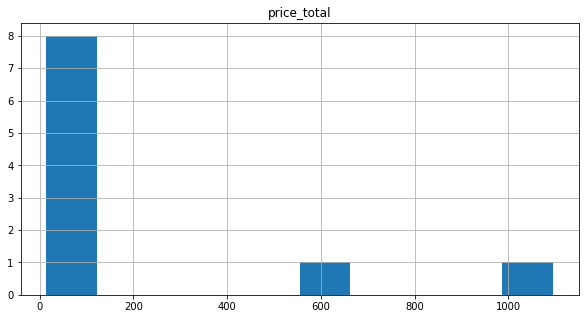

In [25]:
mat.hist("price_total", figsize = (10,5))